*Dataset built by: gcv@cesar.school*

# **Bone Fracture Dataset**

## **Mounting & Importing**

In [ ]:
import os
import cv2
import shutil
import random
import keras
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
from shutil import copyfile
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import get_file
import matplotlib.image as mpimg
import keras.utils as image
import pathlib

%matplotlib inline

In [ ]:
from google.colab import drive
from google.colab import files
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
bone_dataset= "/content/gdrive/MyDrive/Colab Notebooks/Dados/bone_dataset"
training_dir= "/content/gdrive/MyDrive/Colab Notebooks/Dados/bone_dataset/bone_train"
test_dir= "/content/gdrive/MyDrive/Colab Notebooks/Dados/bone_dataset/bone_test"
validation_dir= "/content/gdrive/MyDrive/Colab Notebooks/Dados/bone_dataset/bone_validation"

## **Data Split & Treatment**

Então, inicialmente após montarmos todo o ambiente, foi percebido que o Dataset somente possuia dois arquivos de bases de dados, o Train e o Test, para questões de necessidade do desenvolvimento deste Dataset, decidi criar a base de validação, que será utilizada posteriormente para o treinamento do modelo.

In [ ]:
def make_dir(PATH):
  if not os.path.exists(PATH):
      os.mkdir(PATH)
      return PATH
  else:
    shutil.rmtree(PATH)
    os.mkdir(PATH)
    return PATH

In [ ]:
try:
    validation_dir = make_dir(os.path.join(bone_dataset, 'bone_validation'))

    validation_spiral = make_dir(os.path.join(validation_dir, 'Spiral Fracture'))
    validation_pathological = make_dir(os.path.join(validation_dir, 'Pathological Fracture'))
    validation_oblique = make_dir(os.path.join(validation_dir, 'Oblique Fracture'))
    validation_longitudinal = make_dir(os.path.join(validation_dir, 'Longitudinal Fracture'))
    validation_impacted = make_dir(os.path.join(validation_dir, 'Impacted Fracture'))
    validation_hairline = make_dir(os.path.join(validation_dir, 'Hairline Fracture'))
    validation_greenstick = make_dir(os.path.join(validation_dir, 'Greenstick Fracture'))
    validation_fracture = make_dir(os.path.join(validation_dir, 'Fracture Dislocation'))
    validation_comminuted = make_dir(os.path.join(validation_dir, 'Comminuted Fracture'))
    validation_avulsion = make_dir(os.path.join(validation_dir, 'Avulsion Fracture'))

except OSError:
    pass

In [ ]:
def split_data(SOURCE='', TRAINING='', VALIDATION='', SPLIT_SIZE=0):
  data = os.listdir(SOURCE)
  random_data = random.sample(data, len(data))

  train_size = len(data)*SPLIT_SIZE

  for i, filename in enumerate(random_data):
    filepath = os.path.join(SOURCE, filename)
    if os.path.getsize(filepath) > 0:
      if i < train_size:
        copyfile(filepath, os.path.join(TRAINING, filename))
      else:
        copyfile(filepath, os.path.join(VALIDATION, filename))

In [ ]:
spiral_train = os.path.join(training_dir, 'Spiral Fracture')
pathological_train = os.path.join(training_dir, 'Pathological fracture')
oblique_train = os.path.join(training_dir, 'Oblique fracture')
longitudinal_train = os.path.join(training_dir, 'Longitudinal fracture')
impacted_train = os.path.join(training_dir, 'Impacted fracture')
hairline_train = os.path.join(training_dir, 'Hairline Fracture')
greenstick_train = os.path.join(training_dir, 'Greenstick fracture')
fracture_train = os.path.join(training_dir, 'Fracture Dislocation')
comminuted_train = os.path.join(training_dir, 'Comminuted fracture')
avulsion_train = os.path.join(training_dir, 'Avulsion fracture')

spiral_test = os.path.join(test_dir, 'Spiral Fracture')
pathological_test = os.path.join(test_dir, 'Pathological fracture')
oblique_test = os.path.join(test_dir, 'Oblique fracture')
longitudinal_test = os.path.join(test_dir, 'Longitudinal fracture')
impacted_test = os.path.join(test_dir, 'Impacted fracture')
hairline_test = os.path.join(test_dir, 'Hairline Fracture')
greenstick_test = os.path.join(test_dir, 'Greenstick fracture')
fracture_test = os.path.join(test_dir, 'Fracture Dislocation')
comminuted_test = os.path.join(test_dir, 'Comminuted fracture')
avulsion_test = os.path.join(test_dir, 'Avulsion fracture')

In [ ]:
SPLIT_SIZE = 0.67
split_data(spiral_train, spiral_test, validation_spiral, SPLIT_SIZE)
split_data(pathological_train, pathological_test, validation_pathological, SPLIT_SIZE)
split_data(oblique_train, oblique_test, validation_oblique, SPLIT_SIZE)
split_data(longitudinal_train, longitudinal_test, validation_longitudinal, SPLIT_SIZE)
split_data(impacted_train, impacted_test, validation_impacted, SPLIT_SIZE)
split_data(hairline_train, hairline_test, validation_hairline, SPLIT_SIZE)
split_data(greenstick_train, greenstick_test, validation_greenstick, SPLIT_SIZE)
split_data(fracture_train, fracture_test, validation_fracture, SPLIT_SIZE)
split_data(comminuted_train, comminuted_test, validation_comminuted, SPLIT_SIZE)
split_data(avulsion_train, avulsion_test, validation_avulsion, SPLIT_SIZE)

In [ ]:
def data(dataset_path):
    images = []
    labels = []
    for subfolder in os.listdir(dataset_path):
        subfolder_path = os.path.join(dataset_path, subfolder)
        if not os.path.isdir(subfolder_path):
            continue
        for image_filename in os.listdir(subfolder_path):
            if image_filename.endswith(".jpg"):
                image_path = os.path.join(subfolder_path, image_filename)
                images.append(image_path)
                labels.append(subfolder)
    df = pd.DataFrame({'image': images, 'label': labels})
    return df

## **Data Visualization**

In [ ]:
train_info=data(training_dir)
test_info=data(test_dir)

Com o ambiente 100% setado, decidir realizar a visualização dos dados da base por classes, visto que estamos com um problema multiclasse aqui, e para ver como as imagens estão distribuidas em cada classe.

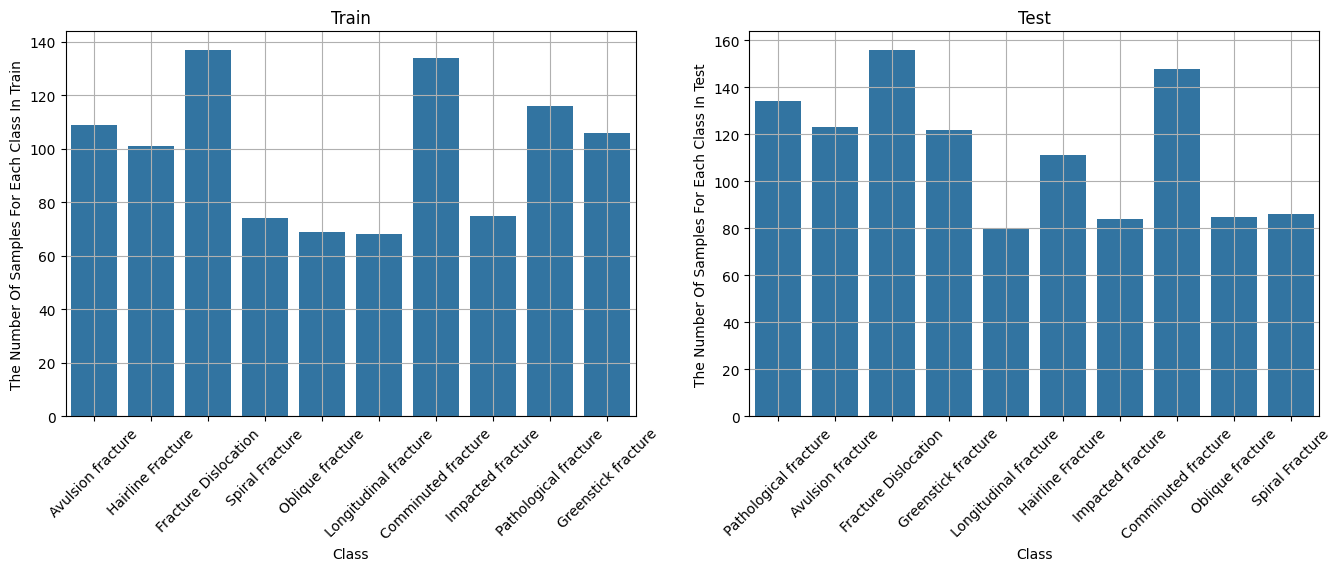

In [ ]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
ax = sns.countplot(x=train_info.label)
ax.set_xlabel("Class")
ax.set_ylabel("The Number Of Samples For Each Class In Train")
plt.title('Train')
plt.grid(True)
plt.xticks(rotation=45)
plt.subplot(1,3,2)
ax = sns.countplot(x=test_info.label)
ax.set_xlabel("Class")
ax.set_ylabel("The Number Of Samples For Each Class In Test")
plt.title('Test')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

Então após essa visualização gráfica, vamos ver como as imagens da base estão, para caso seja necessário realizar algum tratamento nas mesmas.

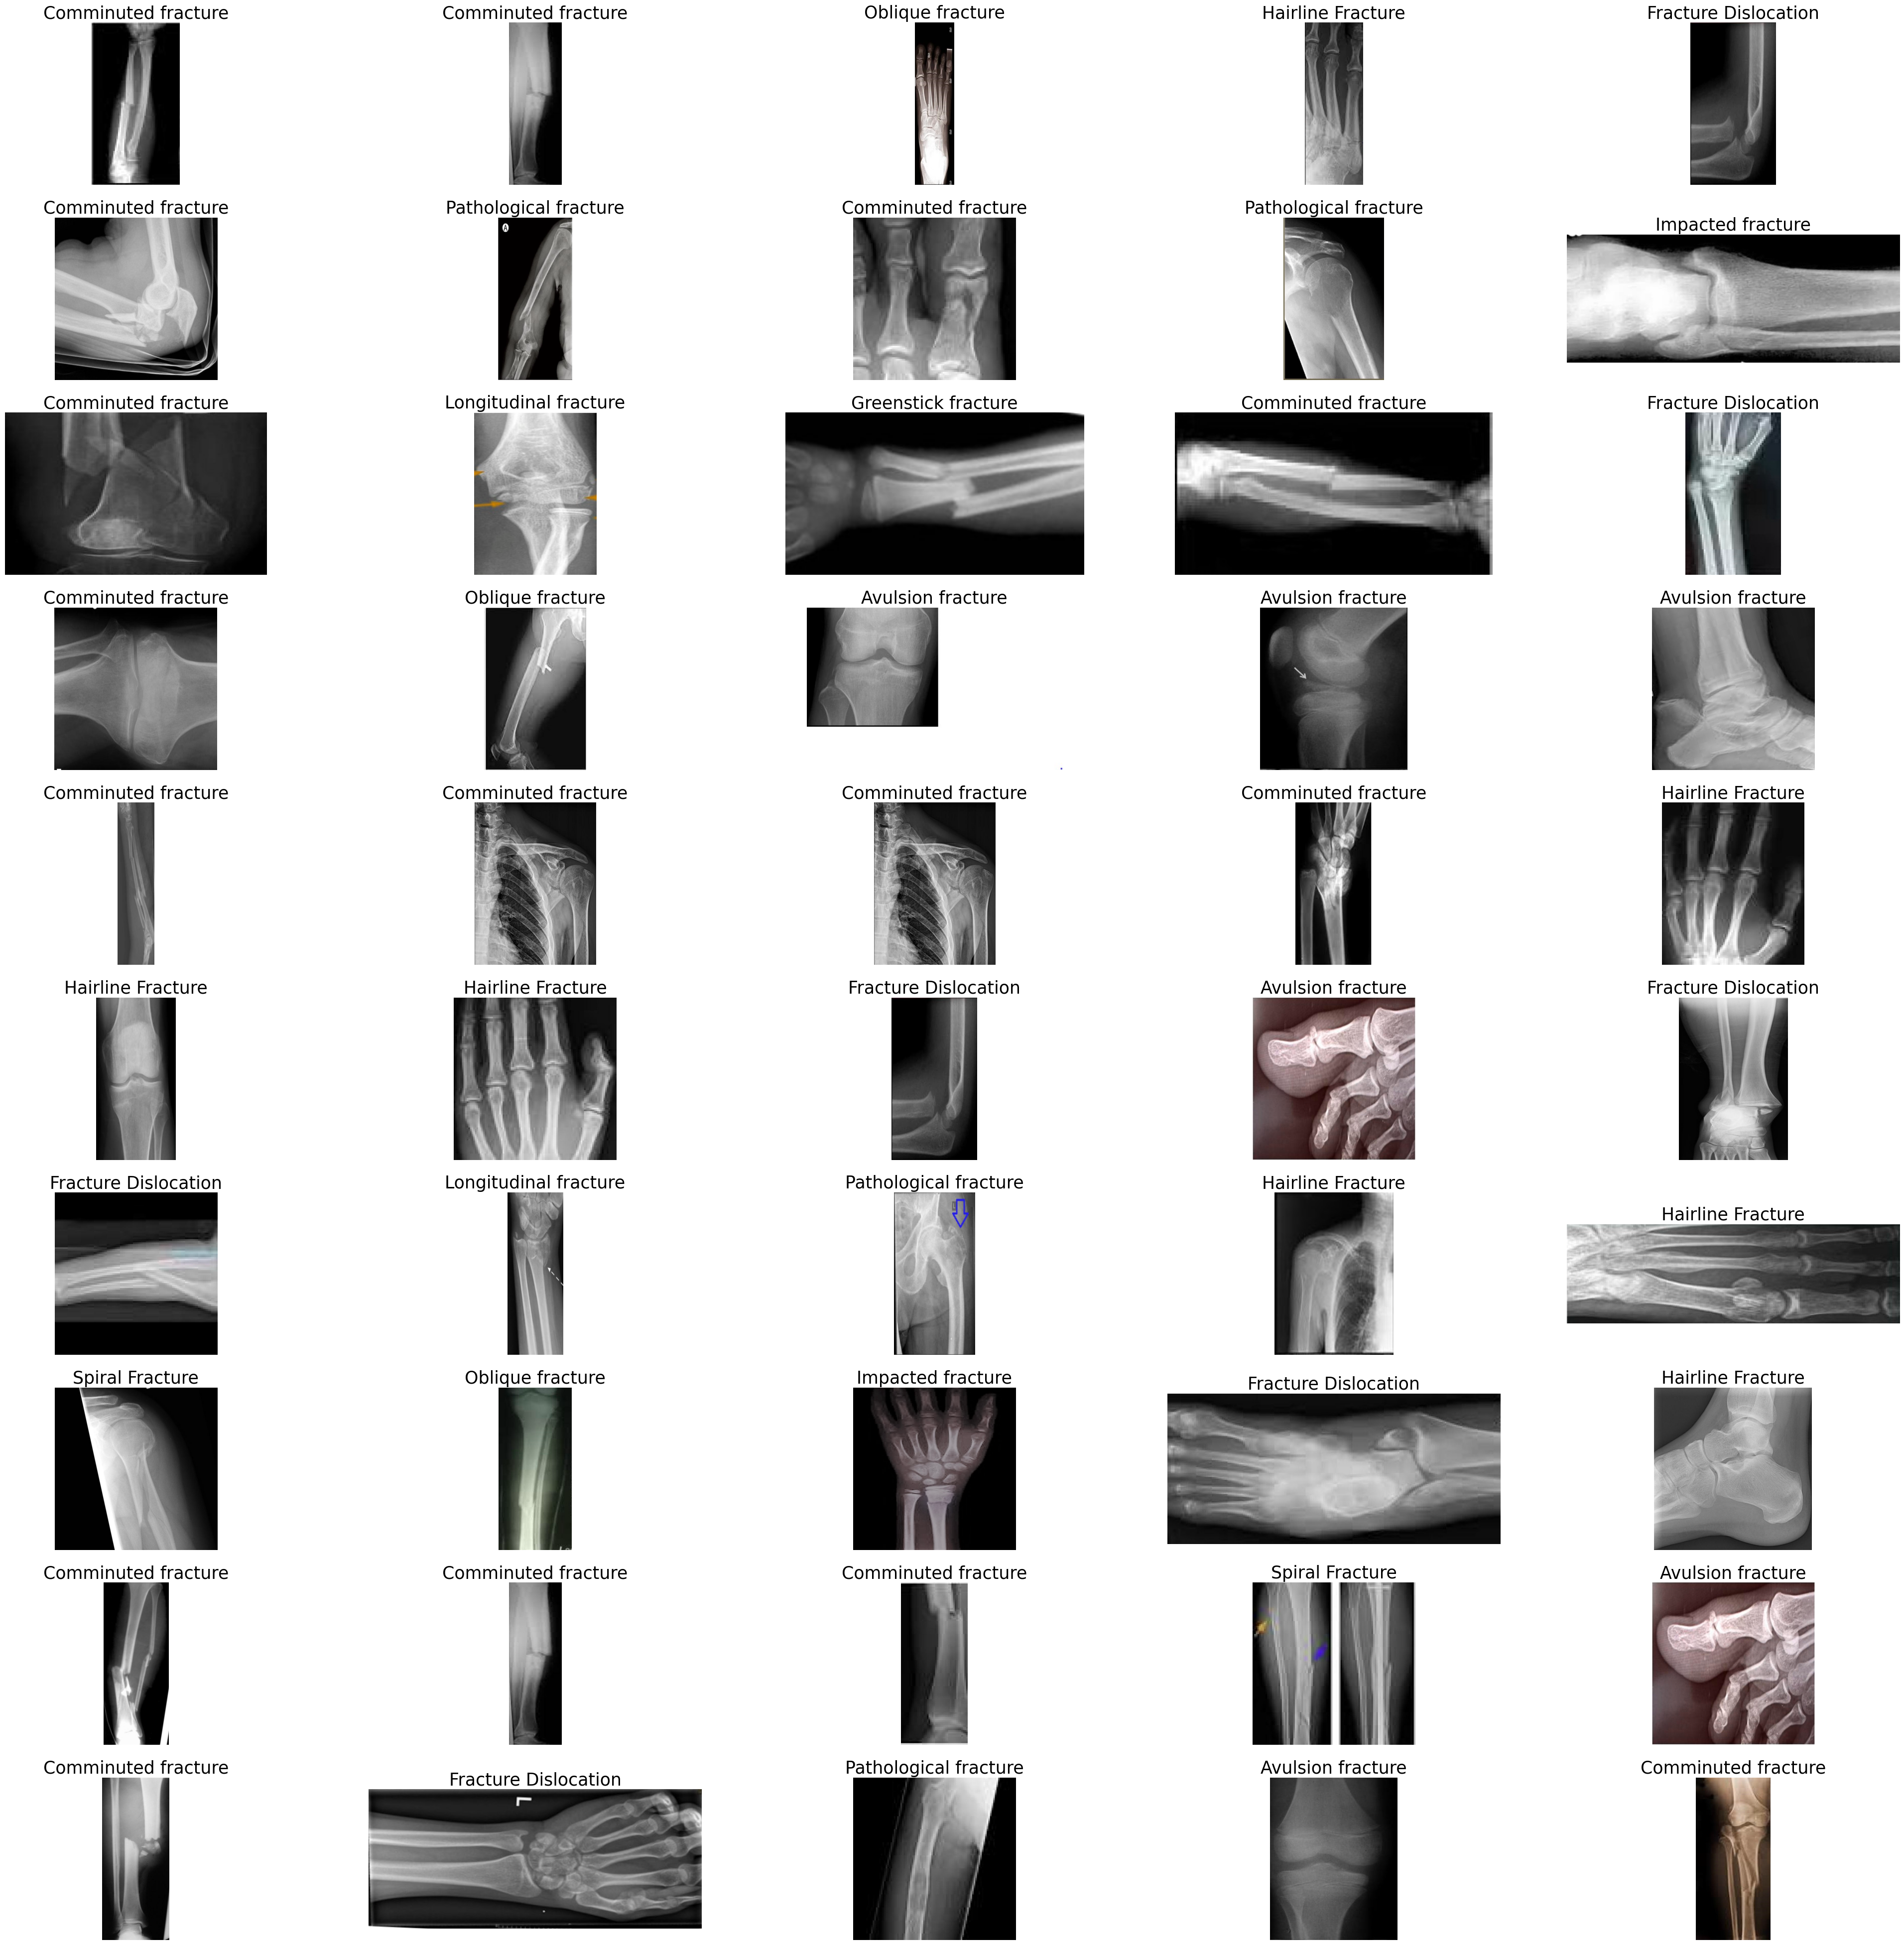

In [ ]:
plt.figure(figsize=(50,50))
for n,i in enumerate(np.random.randint(0,len(train_info),50)):
    plt.subplot(10,5,n+1)
    img=cv2.imread(train_info.image[i])
    plt.imshow(img)
    plt.axis('off')
    plt.title(train_info.label[i],fontsize=25)

É, podemos ver claramente que precisamos realizar um tratamento de imagem neste Dataset, para podermos treinar com o modelo precisamos padronizar essas imagens.

## **Data Augmentation**

In [ ]:
image_size = (200, 200)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255
)
validation_datagen = ImageDataGenerator(
    rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
        training_dir,
        target_size=image_size,
        batch_size=batch_size,
        classes = ['Avulsion fracture','Comminuted fracture', 'Fracture Dislocation',
                   'Greenstick fracture','Hairline Fracture','Impacted fracture',
                   'Longitudinal fracture','Oblique fracture','Pathological fracture','Spiral Fracture'],
        class_mode='categorical',
        shuffle=True
)

validation_generator = train_datagen.flow_from_directory(
        validation_dir,
        target_size=image_size,
        batch_size=batch_size,
         classes = ['Avulsion fracture','Comminuted fracture', 'Fracture Dislocation',
                   'Greenstick fracture','Hairline Fracture','Impacted fracture',
                   'Longitudinal fracture','Oblique fracture','Pathological fracture','Spiral Fracture'],
        class_mode='categorical',
        shuffle=True
)

Found 989 images belonging to 10 classes.
Found 102 images belonging to 10 classes.


Ok, padronizamos nossos dados com caracteristicas e paramêtros que fazem sentido com nosso problema, como por exemplo em class_mode e classes, visto que estamos tratando com diversas classes e que é um problema categorico, então, vamos definir da forma que definimos acima, além de, definir o batch para 32.
Agora, podemos partir para a modelagem e o treinamento de nosso modelo.

## **Modeling & Training**

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Para este problema, decidir utilizar uma **CNN**, visto que faz mais sentido com nosso problema, além de, possuir um bom desempenho para este tipo de problema, para os parametros de treinamento de nosso modelo decidir utilizar o **Adam** como optimizer, visto que ajuda no treinamento do modelo a partir da flexibilidade no **learning_rate**, utilizei também o **categorical_crossentropy** como função de perda, visto que esse é um problema multiclasse em que elas são exclusivas, e a métrica de **accuracy** como nosso ponto de foco do treinamento.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 23, 64)        0

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.98):
      print("\nReached 98% accuracy. Stop Training")
      self.model.stop_training = True

callbacks = myCallback()

E finalmente vamos para o treinamento, nele, decidi utilizar o número de **40 epochs**, por se tratar de um problema com uma boa quantidade de dados, e relativamente complexo, visto que possuimos muitas classes e nosso modelo precisa determinar a partir de uma imagem, qual a classe que aquela imagem pertence. Além de, utilizar os dados de validação para realização de comparação no treinamento do modelo, e também, para buscar evitar **Overfitting**, além de podermos saber a acurácia da validação no treinamento.

In [ ]:
history = model.fit(
    train_generator,
    epochs=40,
    verbose=1,
    callbacks=[callbacks],
    validation_data=validation_generator,
)

Epoch 1/40
31/31 [==============================] - 43s 1s/step - loss: 2.2905 - accuracy: 0.1325 - val_loss: 2.2596 - val_accuracy: 0.0000e+00
Epoch 2/40
31/31 [==============================] - 44s 1s/step - loss: 2.2743 - accuracy: 0.1284 - val_loss: 2.1867 - val_accuracy: 0.0000e+00
Epoch 3/40
31/31 [==============================] - 41s 1s/step - loss: 2.2421 - accuracy: 0.1638 - val_loss: 2.1289 - val_accuracy: 0.3333
Epoch 4/40
31/31 [==============================] - 39s 1s/step - loss: 2.1747 - accuracy: 0.2042 - val_loss: 2.0486 - val_accuracy: 0.2059
Epoch 5/40
31/31 [==============================] - 40s 1s/step - loss: 2.1276 - accuracy: 0.2245 - val_loss: 1.9956 - val_accuracy: 0.3431
Epoch 6/40
31/31 [==============================] - 39s 1s/step - loss: 2.0601 - accuracy: 0.2548 - val_loss: 1.9460 - val_accuracy: 0.3039
Epoch 7/40
31/31 [==============================] - 38s 1s/step - loss: 1.9474 - accuracy: 0.2892 - val_loss: 1.6234 - val_accuracy: 0.4902
Epoch 8/40
3

In [ ]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## **Evaluate Model**

<Figure size 640x480 with 0 Axes>

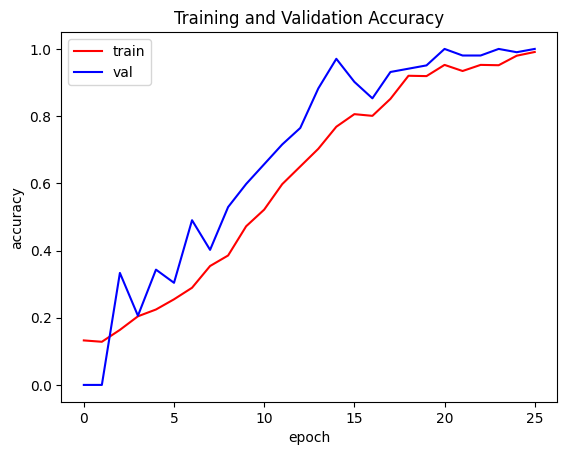

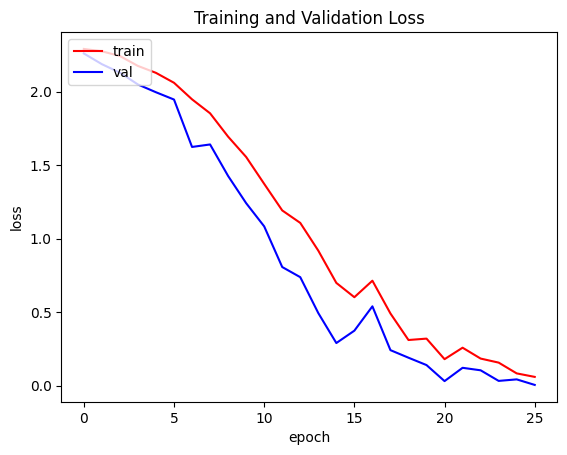

<Figure size 640x480 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validation Loss')
plt.figure()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    batch_size=1,
    target_size=image_size,
    class_mode='categorical',
    classes = ['Avulsion fracture','Comminuted fracture', 'Fracture Dislocation',
               'Greenstick fracture','Hairline Fracture','Impacted fracture',
               'Longitudinal fracture','Oblique fracture','Pathological fracture','Spiral Fracture'],
)

filenames = test_generator.filenames
nb_samples = len(filenames)

loss, acc = model.evaluate(test_generator,steps = (nb_samples), verbose=1)
print('accuracy test: ', acc)

Found 1129 images belonging to 10 classes.
1129/1129 [==============================] - 124s 110ms/step - loss: 1.4188 - accuracy: 0.9141
accuracy test:  0.9140832424163818


Após a finalização do treinamento de nosso modelo, vamos comparar o resultado do mesmo com nossa base de testes, para então, termos uma ideia da acurácia do modelo com a base de testes.

Aqui, temos um exemplo de nosso modelo realizando a detecção da classe no qual uma fratura pertence, neste caso temos uma imagem que é uma fratura da classe "Avulsion", então, buscamos a imagem em nosso Dataset, e realizamos um predict de nosso modelo para ver se conseguirmos detectar a classe da imagem.}

In [ ]:
test_image = image.load_img("/content/gdrive/MyDrive/Colab Notebooks/Dados/bone_dataset/bone_test/Avulsion fracture/000002_png.rf.c3e00ebc2db78bc94e644c3f6605dad0.jpg", target_size = (200,200))

In [ ]:
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)

1/1 [==============================] - 0s 144ms/step


In [ ]:
if result[0][0] == 1:
    print("Avulsion Fracture")
elif result[0][1] == 1:
    print("Comminuted fracture")
elif result[0][2] == 1:
    print("Fracture Dislocation")
elif result[0][3] == 1:
    print("Greenstick fracture")
elif result[0][4] == 1:
    print("Hairline Fracture")
elif result[0][5] == 1:
    print("Impacted Fracture")
elif result[0][6] == 1:
    print("Longitudinal fracture")
elif result[0][7] == 1:
    print("Oblique Dislocation")
elif result[0][8] == 1:
    print("Pathological fracture")
elif result[0][9] == 1:
    print("Spiral fracture")
else:
    print("Unknown")

Avulsion Fracture


Neste caso, nós conseguimos com nosso modelo, detectar que a mesma pertence a classe Avulsion Fracture.